# Confusion Matrix

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7426 - loss: 0.7612 - val_accuracy: 0.8528 - val_loss: 0.4200
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8549 - loss: 0.4136 - val_accuracy: 0.8635 - val_loss: 0.3796
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8705 - loss: 0.3724 - val_accuracy: 0.8593 - val_loss: 0.4025
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8747 - loss: 0.3500 - val_accuracy: 0.8673 - val_loss: 0.3650
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8853 - loss: 0.3208 - val_accuracy: 0.8752 - val_loss: 0.3459
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


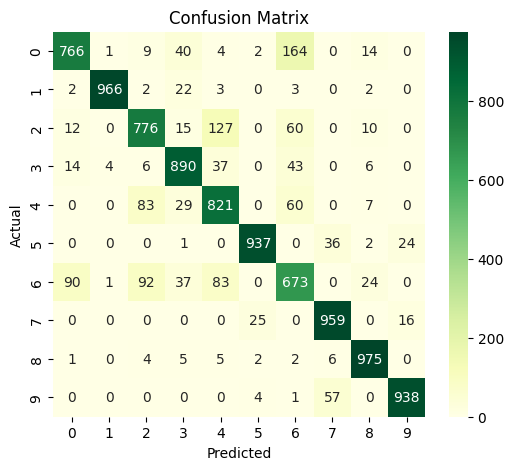

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Initialize wandb
wandb.init(project="fashion-mnist-sweep", name="confusion-matrix-log")

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize
X_train, X_test = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

# Convert labels to one-hot encoding
y_train_cat, y_test_cat = to_categorical(y_train), to_categorical(y_test)

# Simple Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGn')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("conf_matrix.png")  # Save image

# Log to wandb
wandb.log({"confusion_matrix": wandb.Image("conf_matrix.png")})

# Close wandb run
wandb.finish()